In [65]:
import pandas as pd
import numpy as np
df = pd.read_csv("./주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding="cp949", engine="python")
df.head()


,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [66]:
df['지역명'].value_counts()

경남    255
경기    255
서울    255
경북    255
인천    255
제주    255
대구    255
충북    255
세종    255
전남    255
광주    255
강원    255
울산    255
충남    255
대전    255
전북    255
부산    255
Name: 지역명, dtype: int64

In [67]:
df['월'].value_counts()

11    425
10    425
12    425
7     340
3     340
6     340
2     340
9     340
5     340
1     340
8     340
4     340
Name: 월, dtype: int64

In [68]:
df.isnull().sum()
# 분양가격 컬럼만 결측치가 존재하고, 굉장히 clean하게 정리된 데이터임을 알 수 있따.


지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [69]:
# 해당컬럼의 dtype은 numeric이 아니라 object이다
df['분양가격(㎡)'].dtype
# 그러므로 변형해줘야한다

dtype('O')

In [70]:
df['분양가격'] = pd.to_numeric(df['분양가격(㎡)'],errors = 'coerce')
# to_numeric을 해주어야 해당 컬럼의 문자열이 숫자 데이터 타입으로 변경된다.
# 그래야 변환이 제대로 된다.
df['분양가격'].head(1)

# to_numeric하면 object 데이터는 그냥 삭제되는건가?

0    5841.0
Name: 분양가격, dtype: float64

In [71]:
df['평당분양가격'] = df['분양가격']*3.3
# 공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다. 분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [72]:
# 이건 수치 변형이 안된 데이터
df["분양가격(㎡)"].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [73]:
# 이건 수치변형이 완료된 데이터
df["분양가격"].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [74]:
df["규모구분"].unique()
# 아 unique를 쓰면 컬럼 내 데이터의 고유 값들을 리턴

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [75]:
df['규모구분'] = df['규모구분'].str.replace('전용면적','')
df['규모구분'] = df['규모구분'].str.replace('초과','~')
df['규모구분'] = df['규모구분'].str.replace('이하','')
df['규모구분'] = df['규모구분'].str.replace(' ','').str.strip() 
df['전용면적'] = df['규모구분']
#str.strip이건 모야


In [76]:
df['규모구분'].head(10)
# '전체'는 뭐야?

0          전체
1         60㎡
2     60㎡~85㎡
3    85㎡~102㎡
4       102㎡~
5          전체
6         60㎡
7     60㎡~85㎡
8    85㎡~102㎡
9       102㎡~
Name: 규모구분, dtype: object

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
지역명        4335 non-null object
규모구분       4335 non-null object
연도         4335 non-null int64
월          4335 non-null int64
분양가격(㎡)    4058 non-null object
분양가격       3957 non-null float64
평당분양가격     3957 non-null float64
전용면적       4335 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 271.0+ KB


In [78]:
# drop 사용시 axis에 유의 합니다.
# axis 0:행, 1:열
df = df.drop(["규모구분", "분양가격(㎡)"], axis=1)
df.head(10)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
5,인천,2015,10,3163.0,10437.9,전체
6,인천,2015,10,3488.0,11510.4,60㎡
7,인천,2015,10,3119.0,10292.7,60㎡~85㎡
8,인천,2015,10,3545.0,11698.5,85㎡~102㎡
9,인천,2015,10,3408.0,11246.4,102㎡~


In [79]:
# 컬럼 제거를 통해 메모리 사용량이 줄어들었는지 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
지역명       4335 non-null object
연도        4335 non-null int64
월         4335 non-null int64
분양가격      3957 non-null float64
평당분양가격    3957 non-null float64
전용면적      4335 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


In [80]:
df.groupby(['지역명'])['평당분양가격'].mean()
# 오 유용해

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [82]:
df.groupby(['전용면적'])['평당분양가격'].mean()
# 전용면적이 아래와 같이 categorized되어있기 때문에 카테고리별 분양가격의 평균을 쉽게 구할수있다

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [84]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df.groupby(["지역명","전용면적"])["평당분양가격"].mean().unstack().round()
# see, the first column you wrote down goes to the ROW, and another goes to the COLUMN
# So in this case, '지역명' goes to the ROW

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


In [102]:
df.groupby(["전용면적","지역명"])["평당분양가격"].mean().unstack().round()

# unstack으로 dataFrame화 시켜주고, round로 소숫점 없애준다

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [100]:
g = df.groupby(["연도", "지역명"])["평당분양가격"].mean()
g
g.unstack().transpose()
# transpose는 groupby에서 컬럼의 순서를 바꿔준다(즉 dataFrame에선 ROW와COLUMN을 바꿔준다)

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000


# 잘 정리된 데이터는 CLEANING과정도 손쉽다는 느낌

# 미세먼지 데이터 CLEANING할 때와 사뭇 다르다(훨씬 ROUGH했지)

####  한글 사용을 위해 폰트설정

In [115]:
import matplotlib.pyplot as plt # pyplot을 plt로 명명해주는 것

plt.rc("font", family="Malgun Gothic")

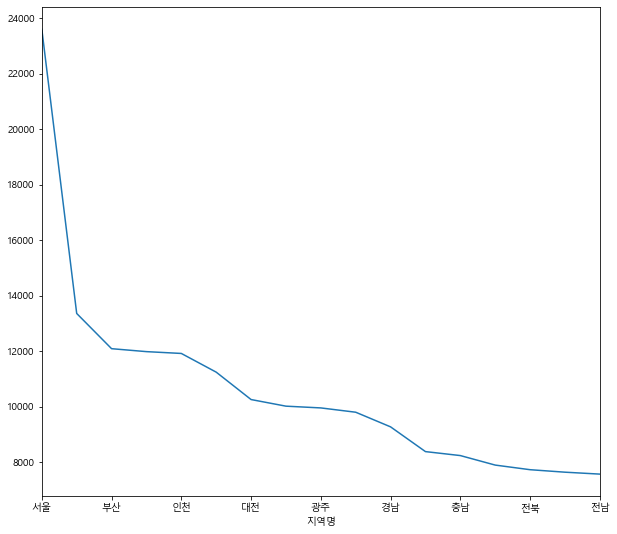

In [116]:
g = df.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)
g.plot(figsize=(10,9))